### Task 1
---

See `build_ensemble` for the grid creator code. Note that the total momentum of the system is set to zero here.
For the implementation of the Verlet integrator, please see the `move` function in `evolve.py`. 

## Task 2
---

As before, please see the logic behind the `move` function in `evolve.py`. 

## Task 3
---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from utils import plot_forces_on_particles, load_configs
from build_ensemble import square_build
from evolve import equilibriate, calculate_energies
from config import N

In [12]:
# 3.1 - For configuration, see `config.py`
np.random.seed(489)
starting_conf = square_build()
newconf, energies, velocities = equilibriate(starting_conf, nsteps=5000, cache_interval=10, folder_name='part_3')

|####################################################################################|100%8%


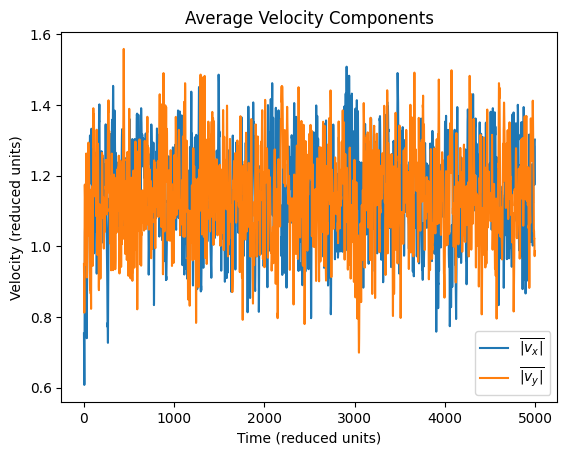

In [13]:
plt.plot(velocities[:,0], label=r'$\overline{|v_x|}$')
plt.plot(velocities[:,1], label=r'$\overline{|v_y|}$')

plt.ylabel("Velocity (reduced units)")
plt.xlabel("Time (reduced units)")

plt.title("Average Velocity Components")
plt.legend()

Here we see the average absolute value of the velocities of the particles in the ensemble, as measured at 10-step intervals. 

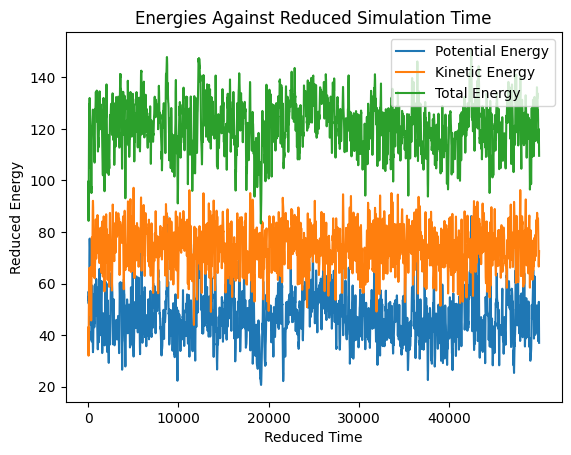

In [14]:
plt.title('Energies Against Reduced Simulation Time')
plt.plot(energies[1], label="Potential Energy")
plt.plot(energies[0], label="Kinetic Energy")
plt.plot(energies[0]+energies[1], label="Total Energy")


time_ticks = np.arange(0,energies[0].size, 100 if energies[0].size/100 <= 10 else 1000)
plt.xticks(time_ticks, time_ticks*10)
plt.xlabel("Reduced Time")
plt.ylabel("Reduced Energy")

plt.legend()

Above plots the total energy, potential energy and kinetic energy against the reduced simulation time. Typically, we would expect that the total energy be conserved since we are operating in the microcanonical ensemble. However, in our instance there seems to be some scaling error that means that the changes in potential and kinetic energy are not in step.

(72.56221140057013, 37.013460223698516)

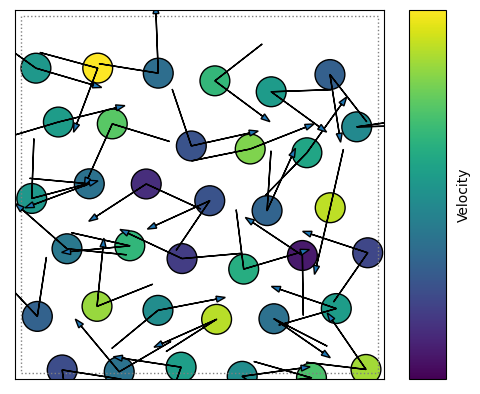

In [15]:
plot_forces_on_particles(newconf, particle_labels=False)
calculate_energies(newconf)